# Striplog objects

This notebooks looks at the main `striplog` object. For the basic objects it depends on, see [Basic objects](./Basic_objects.ipynb).

First, import anything we might need.

In [7]:
%matplotlib inline
import striplog
striplog.__version__

'0.5.6'

In [8]:
from striplog import Legend, Lexicon, Interval, Component

In [9]:
legend = Legend.default()
lexicon = Lexicon.default()

## Making a `striplog`

In [10]:
from striplog import Striplog
print(Striplog.__doc__)


    A Striplog is a sequence of intervals.

    We will build them from LAS files or CSVs.

    Args:
        list_of_Intervals (list): A list of Interval objects.
        source (str): A source for the data. Default None.
    


Here is one of the images we will convert into striplogs:

<img src="M-MG-70_14.3_135.9.png" width=50 style="float:left" />

In [11]:
imgfile = "M-MG-70_14.3_135.9.png"

In [12]:
striplog = Striplog.from_img(imgfile, 14.3, 135.9, legend=legend)
striplog

Striplog(26 Intervals, start=14.3, stop=135.9)

In [13]:
striplog.thinnest(n=7)

Striplog(7 Intervals, start=63.88081237911025, stop=130.30216634429402)

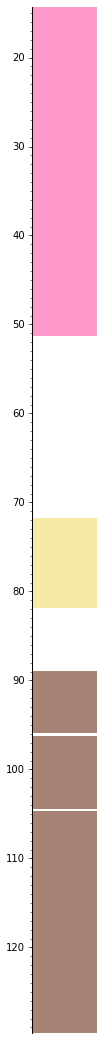

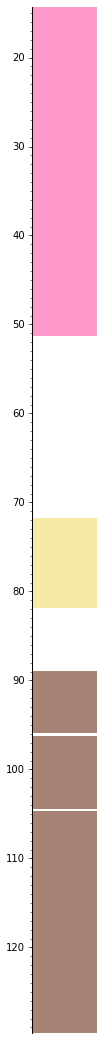

In [14]:
f = striplog.thickest(n=5).plot(legend=legend)
f


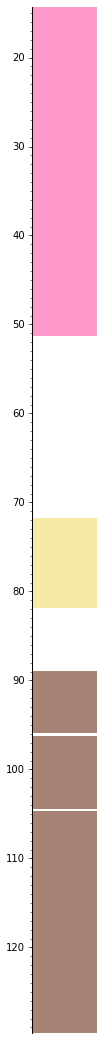

In [17]:
g = striplog.thickest(n=5).plot(legend=legend)

In [27]:
im = g.get_axes()

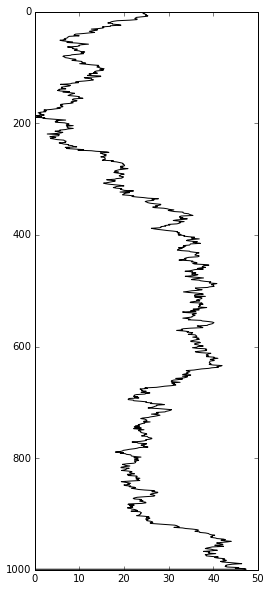

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch

x = np.random.normal(0, 1, 1000).cumsum()
x -= x.min()
y = np.arange(x.size)

fig = plt.figure(figsize=(4, 10))
ax = fig.add_subplot(111)
bgim = ax.imshow(np.random.rand(y.max(), x.max()), cmap='Greys', 
                 extent=[-10, 50, 0, 1000])
im = ax.imshow(x[:, None], extent=[x.min(), x.max(), y.min(), y.max()],
               cmap='gist_earth', aspect='auto', origin='lower')
paths = ax.fill_betweenx(y, x, facecolor='none')
patch = PathPatch(paths._paths[0], visible=False)
ax.add_artist(patch)
im.set_clip_path(patch)
ax.invert_yaxis()
plt.show()

In [18]:
pwd

'/Users/Evan/striplog/tutorial'

In [19]:
g.savefig('../tests/baseline_images/five_thickest_ax.png', dpi=100)

## Making, finding and annealing gaps

This striplog doesn't have any gaps...

In [9]:
if striplog.find_gaps():
    print('Gaps')
else:
    print("No gaps!")

No gaps!


But we can make some by deleting indices:

In [10]:
del striplog[[2, 7, 20]]
striplog.find_gaps()

Striplog(3 Intervals, start=54.75493230174081, stop=104.28870406189556)

We can also get a list of the indices of intervals that are followed by gaps (i.e. are directly above gaps in 'depth' order, or directly below gaps in 'elevation' order).

In [11]:
striplog.find_gaps(index=True)

[1, 5, 17]

In [12]:
striplog.thinnest(1)

Striplog(1 Intervals, start=95.8213926499033, stop=96.19771760154738)

15


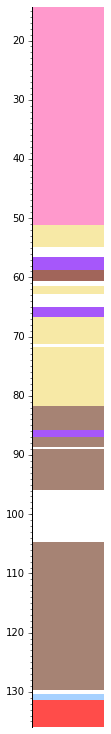

In [13]:
striplog.prune(limit=1)
print(len(striplog))
striplog.plot(legend=legend)

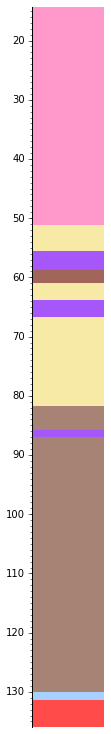

In [14]:
striplog.anneal()
striplog.plot(legend=legend)

In [15]:
striplog.find_gaps()

## Representations of a `striplog`

There are several ways to inspect a striplog:

* **`print`** prints the contents of the striplog
* **`top`** shows us a list of the primary lithologies in the striplog, in order of cumulative thickness
* **`plot`** makes a plot of the striplog with coloured bars

In [16]:
print(striplog[:5])

top: 14.3, base: 51.179845261121855, description: '', components: [Component("lithology":"anhydrite")]
top: 51.179845261121855, base: 55.6251837524178, description: '', components: [Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone")]
top: 55.6251837524178, base: 58.8004255319149, description: '', components: [Component("lithology":"dolomite")]
top: 58.8004255319149, base: 60.89373307543521, description: '', components: [Component("colour":"red", "lithology":"siltstone")]
top: 60.89373307543521, base: 63.8572920696325, description: '', components: [Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone")]


In [17]:
striplog.top

[(Component("colour":"grey", "lithology":"siltstone"), 47.017098646034825),
 (Component("lithology":"anhydrite"), 36.87984526112186),
 (Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone"),
  22.414854932301743),
 (Component("lithology":"dolomite"), 7.244255319148941),
 (Component("lithology":"volcanic"), 4.515899419729209),
 (Component("colour":"red", "lithology":"siltstone"), 2.093307543520311),
 (Component("lithology":"limestone"), 1.434738878143122)]

It's easy enough to visualize this. Perhaps this should be a method...

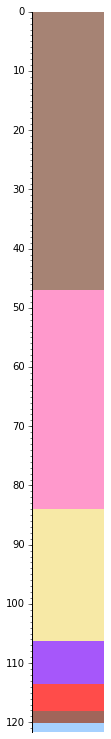

In [18]:
depth = 0
list_of_int = []
for i in striplog.top:
    list_of_int.append(Interval(depth, depth+i[1], components=[i[0]]))
    depth += i[1]
t = Striplog(list_of_int)
t.plot(legend)

## Plot

If you call `plot()` on a `Striplog` you'll get random colours (one per rock type in the striplog), and preset aspect ratio of 10.  

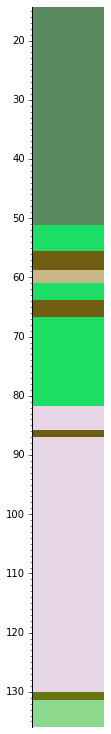

In [19]:
striplog.plot()

For more control, you can pass some parameters. You'll probably always want to pass a legend. 

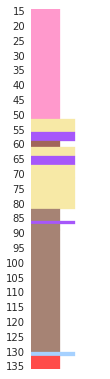

In [69]:
striplog.plot(legend, ladder=True, aspect=5, interval=5)

## Manipulating a `striplog`

Again, the object is indexable and iterable.

In [21]:
print(striplog[:3])

top: 14.3, base: 51.179845261121855, description: '', components: [Component("lithology":"anhydrite")]
top: 51.179845261121855, base: 55.6251837524178, description: '', components: [Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone")]
top: 55.6251837524178, base: 58.8004255319149, description: '', components: [Component("lithology":"dolomite")]


In [22]:
print(striplog[-1].primary.summary())

Volcanic


In [23]:
for i in striplog[:5]:
    print(i.summary())

36.88 m of anhydrite
4.45 m of grey, vf-f, sandstone
3.18 m of dolomite
2.09 m of red, siltstone
2.96 m of grey, vf-f, sandstone


In [24]:
len(striplog)

15

In [25]:
import numpy as np
np.array([d.top for d in striplog[5:13]])

array([  63.85729207,   66.70324952,   71.3837911 ,   81.70920696,
         85.70765957,   86.93071567,   88.67121857,  100.24321083])

You can even index into it with an iterable, like a list of indices.

In [26]:
indices = [2,4,6]
print(striplog[indices])

top: 55.6251837524178, base: 58.8004255319149, description: '', components: [Component("lithology":"dolomite")]
top: 60.89373307543521, base: 63.8572920696325, description: '', components: [Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone")]
top: 66.703249516441, base: 71.38379110251451, description: '', components: [Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone")]


## Querying the striplog

This results in a new Striplog, contianing only the intervals requested.

In [27]:
striplog.find('sandstone')

Striplog(4 Intervals, start=51.179845261121855, stop=81.70920696324951)

In [28]:
striplog.find('sandstone').top

[(Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone"),
  22.414854932301743)]

In [29]:
striplog.find('sandstone').cum

22.414854932301743

In [30]:
print(striplog.find('sandstone'))

top: 51.179845261121855, base: 55.6251837524178, description: '', components: [Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone")]
top: 60.89373307543521, base: 63.8572920696325, description: '', components: [Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone")]
top: 66.703249516441, base: 71.38379110251451, description: '', components: [Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone")]
top: 71.38379110251451, base: 81.70920696324951, description: '', components: [Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone")]


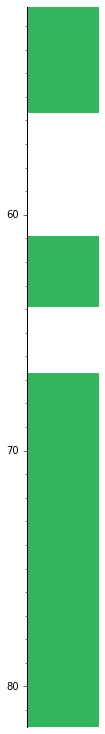

In [31]:
striplog.find('sandstone').plot()

Let's ask for the rock we just found by seaching.

In [32]:
rock = striplog.find('sandstone')[1].components[0]
rock

colour,grey
grainsize,vf-f
lithology,sandstone


We can also search for a rock...

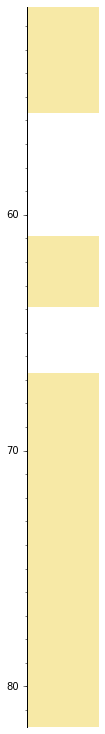

In [33]:
striplog.find(rock).plot(legend)

In [34]:
rock in striplog

True

And we can ask what is at a particular depth.

In [36]:
striplog.depth(90).primary

colour,grey
lithology,siltstone


## Slicing and indexing

In [37]:
for r in reversed(striplog[:5]):
    print(r)

top: 14.3, base: 51.179845261121855, description: '', components: [Component("lithology":"anhydrite")]
top: 51.179845261121855, base: 55.6251837524178, description: '', components: [Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone")]
top: 55.6251837524178, base: 58.8004255319149, description: '', components: [Component("lithology":"dolomite")]
top: 58.8004255319149, base: 60.89373307543521, description: '', components: [Component("colour":"red", "lithology":"siltstone")]
top: 60.89373307543521, base: 63.8572920696325, description: '', components: [Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone")]


Slicing returns a new `striplog`:

In [38]:
striplog[1:3]

Striplog(2 Intervals, start=51.179845261121855, stop=58.8004255319149)

In [39]:
rock2 = Component({'lithology':'shale', 'colour':'grey'})
iv = Interval(top=300, base=350, description='', components=[rock, rock2])

In [40]:
striplog[-3:-1] + Striplog([iv])

Striplog(3 Intervals, start=100.24321083172148, stop=350.0)

## Read or write CSV or LAS3

In [41]:
print(striplog.to_las3())

~Lithology_Parameter
LITH .   Striplog         : Lithology source          {S}
LITHD.   MD               : Lithology depth reference {S}

~Lithology_Definition
LITHT.M                   : Lithology top depth       {F}
LITHB.M                   : Lithology base depth      {F}
LITHD.                    : Lithology description     {S}

~Lithology_Data | Lithology_Definition
   14.300,   51.180,  "Anhydrite"                                     
   51.180,   55.625,  "Grey, vf-f, sandstone"                         
   55.625,   58.800,  "Dolomite"                                      
   58.800,   60.894,  "Red, siltstone"                                
   60.894,   63.857,  "Grey, vf-f, sandstone"                         
   63.857,   66.703,  "Dolomite"                                      
   66.703,   71.384,  "Grey, vf-f, sandstone"                         
   71.384,   81.709,  "Grey, vf-f, sandstone"                         
   81.709,   85.708,  "Grey, siltstone"                   

In [42]:
striplog.source

'Image'

In [43]:
csv_string = """  200.000,  230.329,  Anhydrite                                       
  230.329,  233.269,  Grey vf-f sandstone                             
  233.269,  234.700,  Anhydrite                                       
  234.700,  236.596,  Dolomite                                        
  236.596,  237.911,  Red siltstone                                   
  237.911,  238.723,  Anhydrite                                       
  238.723,  239.807,  Grey vf-f sandstone                             
  239.807,  240.774,  Red siltstone                                   
  240.774,  241.122,  Dolomite                                        
  241.122,  241.702,  Grey siltstone                                  
  241.702,  243.095,  Dolomite                                        
  243.095,  246.654,  Grey vf-f sandstone                             
  246.654,  247.234,  Dolomite                                        
  247.234,  255.435,  Grey vf-f sandstone                             
  255.435,  258.723,  Grey siltstone                                  
  258.723,  259.729,  Dolomite                                        
  259.729,  260.967,  Grey siltstone                                  
  260.967,  261.354,  Dolomite                                        
  261.354,  267.041,  Grey siltstone                                  
  267.041,  267.350,  Dolomite                                        
  267.350,  274.004,  Grey siltstone                                  
  274.004,  274.313,  Dolomite                                        
  274.313,  294.816,  Grey siltstone                                  
  294.816,  295.397,  Dolomite                                        
  295.397,  296.286,  Limestone                                       
  296.286,  300.000,  Volcanic                                        
"""

In [44]:
strip2 = Striplog.from_csv(csv_string, lexicon=lexicon)

Notice the warning about a missing term in the lexicon.

In [45]:
Component.from_text('Volcanic', lexicon)

Component()

In [46]:
Component.from_text('Grey vf-f sandstone', lexicon)

colour,grey
grainsize,vf-f
lithology,sandstone


In [47]:
las3 = """~Lithology_Parameter
LITH .                    : Lithology source          {S}
LITHD.   MD               : Lithology depth reference {S}

~Lithology_Definition
LITHT.M                   : Lithology top depth       {F}
LITHB.M                   : Lithology base depth      {F}
LITHN.                    : Lithology name            {S}

~Lithology_Data | Lithology_Definition
  200.000,  230.329,  Anhydrite                                       
  230.329,  233.269,  Grey vf-f sandstone                             
  233.269,  234.700,  Anhydrite                                       
  234.700,  236.596,  Dolomite                                        
  236.596,  237.911,  Red siltstone                                   
  237.911,  238.723,  Anhydrite                                       
  238.723,  239.807,  Grey vf-f sandstone                             
  239.807,  240.774,  Red siltstone                                   
  240.774,  241.122,  Dolomite                                        
  241.122,  241.702,  Grey siltstone                                  
  241.702,  243.095,  Dolomite                                        
  243.095,  246.654,  Grey vf-f sandstone                             
  246.654,  247.234,  Dolomite                                        
  247.234,  255.435,  Grey vf-f sandstone                             
  255.435,  258.723,  Grey siltstone                                  
  258.723,  259.729,  Dolomite                                        
  259.729,  260.967,  Grey siltstone                                  
  260.967,  261.354,  Dolomite                                        
  261.354,  267.041,  Grey siltstone                                  
  267.041,  267.350,  Dolomite                                        
  267.350,  274.004,  Grey siltstone                                  
  274.004,  274.313,  Dolomite                                        
  274.313,  294.816,  Grey siltstone                                  
  294.816,  295.397,  Dolomite                                        
  295.397,  296.286,  Limestone                                       
  296.286,  300.000,  Volcanic                                        
"""

In [48]:
strip3 = Striplog.from_las3(las3, lexicon)
strip3

Striplog(26 Intervals, start=200.0, stop=300.0)

In [49]:
strip3.top

[(Component("colour":"grey", "lithology":"siltstone"), 37.94999999999999),
 (Component("lithology":"anhydrite"), 32.572),
 (Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone"),
  15.783999999999963),
 (Component("lithology":"dolomite"), 6.809000000000026),
 (Component(), 3.7139999999999986),
 (Component("colour":"red", "lithology":"siltstone"), 2.2820000000000107),
 (Component("lithology":"limestone"), 0.88900000000001)]

## Handling tops

I recommend treating tops as intervals, not as point data.

In [50]:
tops_csv = """100, Escanilla Fm.
200, Sobrarbe Fm. 
350, San Vicente Fm.
500, Cretaceous
"""

In [51]:
tops = Striplog.from_csv(tops_csv)

/home/matt/anaconda3/envs/striplog3/lib/python3.3/site-packages/striplog/interval.py:74: UserWarning: You must provide a lexicon to generate components from descriptions.
  warnings.warn(w)
/home/matt/anaconda3/envs/striplog3/lib/python3.3/site-packages/striplog/interval.py:74: UserWarning: You must provide a lexicon to generate components from descriptions.
  warnings.warn(w)
/home/matt/anaconda3/envs/striplog3/lib/python3.3/site-packages/striplog/interval.py:74: UserWarning: You must provide a lexicon to generate components from descriptions.
  warnings.warn(w)
/home/matt/anaconda3/envs/striplog3/lib/python3.3/site-packages/striplog/interval.py:74: UserWarning: You must provide a lexicon to generate components from descriptions.
  warnings.warn(w)


In [52]:
print(tops)

top: 100.0, base: 200.0, description: 'Escanilla Fm.', components: []
top: 200.0, base: 350.0, description: 'Sobrarbe Fm.', components: []
top: 350.0, base: 500.0, description: 'San Vicente Fm.', components: []
top: 500.0, base: 501.0, description: 'Cretaceous', components: []


In [53]:
tops.depth(254.0)

Interval(top: 200.0, base: 350.0, description: 'Sobrarbe Fm.', components: [])

## Handling point data

Some things really are point data.

In [54]:
data_csv = """1200, 6.4
1205, 7.3
1210, 8.2
1250, 9.2
1275, 4.3
1300, 2.2
"""

In [55]:
data = Striplog.from_csv(data_csv, points=True)

/home/matt/anaconda3/envs/striplog3/lib/python3.3/site-packages/striplog/interval.py:74: UserWarning: You must provide a lexicon to generate components from descriptions.
  warnings.warn(w)
/home/matt/anaconda3/envs/striplog3/lib/python3.3/site-packages/striplog/interval.py:74: UserWarning: You must provide a lexicon to generate components from descriptions.
  warnings.warn(w)
/home/matt/anaconda3/envs/striplog3/lib/python3.3/site-packages/striplog/interval.py:74: UserWarning: You must provide a lexicon to generate components from descriptions.
  warnings.warn(w)
/home/matt/anaconda3/envs/striplog3/lib/python3.3/site-packages/striplog/interval.py:74: UserWarning: You must provide a lexicon to generate components from descriptions.
  warnings.warn(w)
/home/matt/anaconda3/envs/striplog3/lib/python3.3/site-packages/striplog/interval.py:74: UserWarning: You must provide a lexicon to generate components from descriptions.
  warnings.warn(w)
/home/matt/anaconda3/envs/striplog3/lib/python3.3/

StriplogError: Could not determine order from tops and bases.

In [56]:
print(data)

NameError: name 'data' is not defined

One day, when we have a use case, we can do something nice with this, like treat it as numerical data, and make a plot for it. We need an elegant way to get that number into a 'rock', like {'x': 6.4}, etc. 

## Hacking histogram

In [21]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn; seaborn.set()

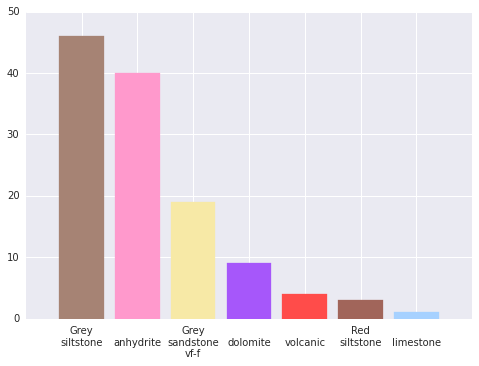

In [22]:
fmt = '{colour}\n{lithology}\n{grainsize}'
labels = [c.summary(fmt=fmt) for c in comps]
colours = [legend.get_colour(c) for c in comps]

fig, ax = plt.subplots()
ind = np.arange(len(comps))
bars = ax.bar(ind, counts, align='center')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
for b, c in zip(bars, colours):
    b.set_color(c)
plt.show()

<hr />

<p style="color:gray">©2015 Agile Geoscience. Licensed CC-BY. <a href="https://github.com/agile-geoscience/striplog">striplog.py</a></p>